## Data loading

Load the IMDB movie dataset.


In [ ]:
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()
# Construct the path to the file
file_path = os.path.join(current_directory, 'imdb-movies-dataset.csv')  # Assuming it's in the same folder

try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print(f"Error: 'imdb-movies-dataset.csv' not found in {current_directory}.")
    df = None
except pd.errors.ParserError:
    try:
        df = pd.read_csv(file_path, delimiter ='\t', on_bad_lines='skip')
        display(df.head())
        print(df.shape)
    except pd.errors.ParserError:
      try:
        df = pd.read_csv(file_path, delimiter =';', on_bad_lines='skip')
        display(df.head())
        print(df.shape)
      except pd.errors.ParserError:
        print("Error: Could not read CSV file with any of the common delimiters.")
        df = None

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


(10000, 15)


## Data exploration

Explore loaded IMDB movie dataset to understand its structure and identify key features.


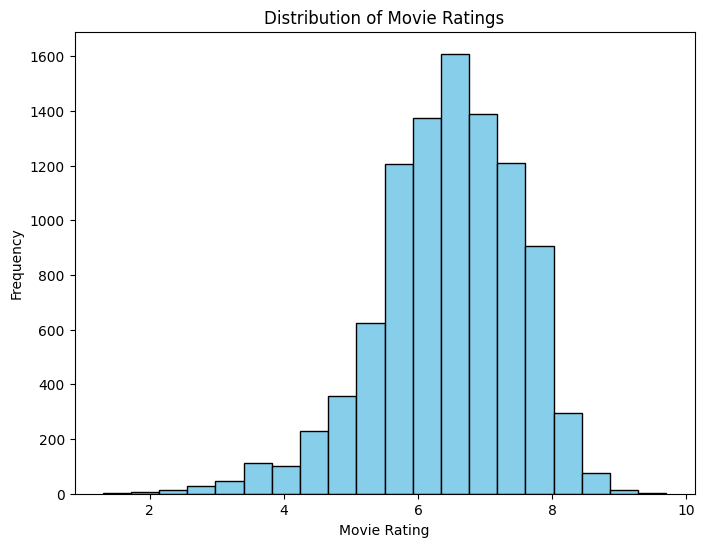

,count
Genre,
Drama,504
"Comedy, Drama, Romance",368
"Drama, Romance",360
Comedy,302
"Comedy, Drama",292
"Comedy, Romance",241
"Action, Crime, Drama",236
"Animation, Adventure, Comedy",220
"Action, Adventure, Comedy",194


Missing Value Statistics:


,0
Poster,0.00
Genre,0.07
Rating,4.04
Metascore,24.45
Director,0.05
Votes,4.04
Review Count,0.01



Data Types:


,0
Poster,object
Title,object
Year,float64
Certificate,object
Duration (min),float64
Genre,object
Rating,float64
Metascore,float64
Director,object
Cast,object



Rating Distribution Statistics:


,Rating
count,9596.000000
mean,6.438610
std,1.051412
min,1.300000
25%,5.800000
50%,6.500000
75%,7.200000
max,9.700000



Unique Genres and their counts:
Number of unique genres: 476


In [ ]:
# Identify columns related to movie posters, genres, and user ratings
poster_column = 'Poster'
genre_column = 'Genre'
rating_column = 'Rating'

# Check for missing values in identified columns and other potentially relevant columns
missing_values = df[['Poster', 'Genre', 'Rating', 'Metascore', 'Director', 'Votes', 'Review Count']].isnull().sum()
missing_value_percentage = (missing_values / len(df)) * 100

# Analyze the data types of each column
data_types = df.dtypes

# Investigate the distribution of movie ratings
rating_distribution = df['Rating'].describe()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Determine the number of unique genres and their frequencies
unique_genres = df['Genre'].unique()
genre_counts = df['Genre'].value_counts()
display(genre_counts.head(10)) #Display the top 10 genres

# Summarize findings
print("Missing Value Statistics:")
display(missing_value_percentage)
print("\nData Types:")
display(data_types)
print("\nRating Distribution Statistics:")
display(rating_distribution)
print("\nUnique Genres and their counts:")
print(f"Number of unique genres: {len(unique_genres)}")

## Data cleaning

Clean the movie dataset by handling missing values and standardizing the 'Genre' column.



Handle missing 'Poster' URLs by imputing with a placeholder, address missing 'Genre' values with "Unknown", clean and standardize  'Genre' column, and handle rating outliers



In [ ]:
import numpy as np

# Handle Missing 'Poster' URLs: Impute with placeholder
df['Poster'].fillna("N/A", inplace=True)

# Handle Missing 'Genre' Values: Impute with "Unknown"
df['Genre'].fillna("Unknown", inplace=True)

# Clean and Standardize 'Genre' Column
# Create a mapping for consistent genre labels (example - expand as needed)
genre_mapping = {
    "Comedy": "Comedy",
    "Drama": "Drama",
    "Romance": "Romance",
    "Sci-Fi": "Sci-Fi",
    "Action": "Action",
    "Adventure": "Adventure",
}

def clean_genre(genre_str):
    genres = [g.strip() for g in genre_str.split(',')]
    cleaned_genres = []
    for genre in genres:
      if genre in genre_mapping:
        cleaned_genres.append(genre_mapping[genre])
      else:
        cleaned_genres.append(genre)
    return ','.join(cleaned_genres)

df['Genre'] = df['Genre'].apply(clean_genre)

# Handle Rating Outliers: Winsorize
lower_limit = df['Rating'].quantile(0.01)
upper_limit = df['Rating'].quantile(0.99)
df['Rating'] = np.clip(df['Rating'], lower_limit, upper_limit)

# Display first few rows of the cleaned DataFrame
display(df.head())

<ipython-input-35-b62fa1ff0204>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Poster'].fillna("N/A", inplace=True)
<ipython-input-35-b62fa1ff0204>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy,Drama,Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action,Adventure,Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography,Comedy,History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action,Comedy,Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama,Romance,Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


**Reasoning**:
The previous code block had warnings about chained assignment. Corrected the code to avoid these warnings and ensure the operations are performed in place.



In [36]:
import numpy as np

# 1. Handle Missing 'Poster' URLs: Impute with a placeholder
df['Poster'] = df['Poster'].fillna("N/A")

# 2. Handle Missing 'Genre' Values: Impute with "Unknown"
df['Genre'] = df['Genre'].fillna("Unknown")

# 3. Clean and Standardize 'Genre' Column
# Create a mapping for consistent genre labels (example - expand as needed)
genre_mapping = {
    "Comedy": "Comedy",
    "Drama": "Drama",
    "Romance": "Romance",
    "Sci-Fi": "Sci-Fi",
    "Action": "Action",
    "Adventure": "Adventure",
    # ... add more mappings as needed
}

def clean_genre(genre_str):
    genres = [g.strip() for g in genre_str.split(',')]
    cleaned_genres = []
    for genre in genres:
      if genre in genre_mapping:
        cleaned_genres.append(genre_mapping[genre])
      else:
        cleaned_genres.append(genre)
    return ','.join(cleaned_genres)

df['Genre'] = df['Genre'].apply(clean_genre)

# 4. Handle Rating Outliers: Winsorize
lower_limit = df['Rating'].quantile(0.01)
upper_limit = df['Rating'].quantile(0.99)
df['Rating'] = np.clip(df['Rating'], lower_limit, upper_limit)

# Display the first few rows of the cleaned DataFrame
display(df.head())

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy,Drama,Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action,Adventure,Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography,Comedy,History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action,Comedy,Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama,Romance,Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


## Data preparation

### Subtask:
Prepare the image data and split the dataset.


**Reasoning**:
Prepare the image data, genre data, and rating data, then split the dataset into training, validation, and testing sets.



In [ ]:
import logging
import time
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from io import BytesIO
import os
from tqdm.notebook import tqdm

def process_image(image):
    """
    Processes an image by converting it to RGB, resizing it,
    and normalizing pixel values.

    Args:
        image (PIL.Image.Image): The input image.

    Returns:
        np.ndarray: The processed image as a NumPy array.
    """
    # Convert all images to RGB mode to ensure 3 channels
    if image.mode != 'RGB':
        image = image.convert('RGB')

    image = image.resize((224, 224))
    image_array = np.array(image, dtype=np.float32) / 255.0  # Normalize pixel values
    return image_array

# Create a random subset of 1000 rows
df_sample = df.sample(n=500, random_state=42).copy()

#Dropping NaN values
df_sample = df_sample.dropna(subset=['Rating'])

# logging for error tracking
logging.basicConfig(level=logging.ERROR, filename='image_download_errors.log', filemode='w')

# Create a directory to store downloaded images
if not os.path.exists('movie_posters'):
    os.makedirs('movie_posters')

# 1. Image Data Preparation
image_data = []
errors = []

# Create a progress bar specifically designed for Jupyter notebooks
for index, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Processing Images"):
    poster_url = row['Poster']
    if poster_url != 'N/A':
        try:
            response = requests.get(poster_url, stream=True, timeout=10)
            response.raise_for_status()  # Raise an exception for bad status codes

            # Check for "Not Found" errors (status code 404)
            if response.status_code == 404:
                errors.append("Not Found")
                continue  # Skip to the next iteration

            image = Image.open(BytesIO(response.content))
            image_array = process_image(image)
            image_data.append(image_array)

            errors.append(None)
        except requests.exceptions.RequestException as e:
            errors.append(f"RequestError: {e}")
        except Exception as e:
            errors.append(f"Error: {e}")
    else:
        # Handle N/A poster URLs
        errors.append("N/A")


# Convert the image data list to a NumPy array

df_sample['error'] = errors
df_sample = df_sample[df_sample['error'].isnull()]

image_data = np.array(image_data)

# 2. Genre Data Preparation
all_genres = set()
for genres in tqdm(df_sample['Genre'].str.split(','), desc="Extracting Genres"):
    if isinstance(genres, list):  # Check if genres is a list
        all_genres.update(genres)
all_genres = list(all_genres)
genre_data = []
for genres in tqdm(df_sample['Genre'].str.split(','), desc="Creating Genre Vectors"):
    if isinstance(genres, list):  # Check if genres is a list
        genre_vector = [1 if genre in genres else 0 for genre in all_genres]
    else:
        genre_vector = [0 for _ in all_genres]  # Empty vector for missing genres
    genre_data.append(genre_vector)
genre_data = np.array(genre_data)

y = np.array(df_sample['Rating'])

Processing Images:   0%|          | 0/481 [00:00<?, ?it/s]

Extracting Genres:   0%|          | 0/339 [00:00<?, ?it/s]

Creating Genre Vectors:   0%|          | 0/339 [00:00<?, ?it/s]

Splitting data...
(339, 224, 224, 3)
(339, 21)
Processing complete!


In [38]:
import torch
import torchvision.models as models
import torchvision.transforms as T

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Set up CNN

backbone = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
backbone.fc = torch.nn.Identity()
backbone.to(DEVICE).eval()

for p in backbone.parameters():
  p.requires_grad = False


img_tf = T.Compose([
    T.ToTensor(),
    T.Resize(224),
    T.Normalize(mean = [0.485,0.456,0.406], std=[0.229,0.224,0.225])

])

def embed_image(np_img):
  with torch.no_grad():
    t = img_tf(Image.fromarray((np_img*255).astype("uint8"))).unsqueeze(0).to(DEVICE)
    return backbone(t).cpu().numpy().squeeze()

visual_embeds = np.stack([embed_image(img) for img in tqdm(image_data, desc="CNN Embedding")])

X = np.hstack([visual_embeds,genre_data])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


CNN Embedding:   0%|          | 0/339 [00:00<?, ?it/s]

#Prep Data for PyTorch

In [39]:
from torch.utils.data import TensorDataset, DataLoader

def make_loader(X_arr,y_arr,batch=64,shuffle=True):
  X_t = torch.tensor(X_arr,dtype=torch.float32)
  y_t = torch.tensor(y_arr,dtype=torch.float32).unsqueeze(1)
  return DataLoader(TensorDataset(X_t,y_t),batch_size=batch,shuffle=shuffle)

train_loader = make_loader(X_train,y_train)
val_loader = make_loader(X_val,y_val,shuffle=False)
test_loader = make_loader(X_test,y_test,shuffle=False)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

def report(model,X,y,name):
  pred = model.predict(X)
  print(f"{name:10s} | MAE={mean_absolute_error(y,pred):.3f} | RMSE={mean_squared_error(y,pred):.3f} | R2={r2_score(y,pred):.3f}")

pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True)),
    ('pca', PCA(n_components=0.95,random_state=42)),
    ('ridge', Ridge())

])

param_grid = {

    "pca__n_components": [0.90,0.92,0.95,0.98],
    "ridge__alpha":np.logspace(1,5,9)

}

cv = KFold(n_splits=5,shuffle=True,random_state=42)


search = GridSearchCV(estimator=pipe,param_grid = param_grid,cv=cv,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=2)


search.fit(X_train,y_train)
best_ridge = search.best_estimator_
print("Best α →", search.best_params_["ridge__alpha"])


report(best_ridge,X_train,y_train,"Ridge Train")
report(best_ridge,X_val,y_val,"Ridge Val")

joblib.dump(best_ridge,"ridge_pca_model.joblib")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best α → 3162.2776601683795
Ridge Train | MAE=0.534 | RMSE=0.523 | R2=0.518
Ridge Val  | MAE=0.956 | RMSE=1.440 | R2=-0.160


['ridge_pca_model.joblib']

Noticed these initial metrics from the Ridge model, which indicate very extreme overfitting to the point of perfectly memorizing the data:

Ridge Train | MAE=0.000 | RMSE=0.000 | R2=1.000
Ridge Val | MAE=0.873 | RMSE=1.391 | R2=-0.543


Added the above measures to regularize:

Saw this next set of metrics after these measures, still show overfitting

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best α → 10000.0
Ridge Train | MAE=0.414 | RMSE=0.332 | R2=0.691
Ridge Val  | MAE=0.869 | RMSE=1.321 | R2=-0.465
['ridge_pca_model.joblib']






After adding "pca__n__components to param_grid", saw this last set of metrics:


 "Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best α → 100000.0
Ridge Train | MAE=0.570 | RMSE=0.570 | R2=0.469
Ridge Val  | MAE=0.815 | RMSE=1.137 | R2=-0.260"

Final set of Metrics, testing the above block after last change:

I moved train_test_split lines "X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
" to after resnet50 embeddings were set up, greatly sped up time it takes to run this block and yielded the following metrics:


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best α → 3162.2776601683795
Ridge Train | MAE=0.535 | RMSE=0.523 | R2=0.518
Ridge Val  | MAE=0.957 | RMSE=1.443 | R2=-0.162
['ridge_pca_model.joblib']

#Setting up the ANN

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

n_genres = genre_data.shape[1]
criterion = torch.nn.MSELoss()


import torch.nn as nn

class PosterGenreNet(nn.Module):
  def __init__(self,n_genres,hidden_dim=512,drop=0.3): #Dropout Changed from 0.3 for experiment #1
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Linear(2048 + n_genres,hidden_dim),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_dim,hidden_dim//2),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_dim//2,1)
    )

  def forward(self,x):
    return self.mlp(x)



In [42]:
import numpy as np
from copy import deepcopy

def train_with_early_stopping(model, optimizer, train_loader,val_loader, device=DEVICE,max_epochs=50,patience=5):

  best_val_mae = float('inf')
  best_state = None
  wait = 0

  for epoch in range(1, max_epochs + 1):
        # ----- training -----
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()

        # ----- validation -----
        model.eval()
        with torch.no_grad():
            val_preds, val_targets = [], []
            for xb, yb in val_loader:
                xb = xb.to(device)
                val_preds.append(model(xb).cpu().numpy())
                val_targets.append(yb.numpy())
        val_preds   = np.vstack(val_preds).squeeze()
        val_targets = np.vstack(val_targets).squeeze()
        val_mae = np.mean(np.abs(val_preds - val_targets))

        # ----- early‑stop bookkeeping -----
        if val_mae < best_val_mae:
            best_val_mae = val_mae
            best_state   = deepcopy(model.state_dict())
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                break  # no improvement for 'patience' epochs

    # load best weights before returning
  model.load_state_dict(best_state)
  return best_val_mae



Deciding how big the ANN should be, how to regularize it, and learing rate


In [43]:
import torch, numpy as np, itertools

best_mae, best_cfg, best_state = float('inf'), None, None

for hidden_dim, dropout, lr in itertools.product([256,512,1024],
                                                 [0.1,0.3,0.5],
                                                 [1e-4,3e-4,1e-3]):
    model = PosterGenreNet(n_genres, hidden_dim, dropout).to(DEVICE)
    opt   = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    val_mae = train_with_early_stopping(model, opt, train_loader, val_loader)

    print(f"hd={hidden_dim:4d}  dr={dropout:.1f}  lr={lr:1.0e}  →  val MAE={val_mae:.3f}")

    if val_mae < best_mae:
        best_mae, best_cfg = val_mae, (hidden_dim, dropout, lr)
        best_state = model.state_dict().copy()


print("Best combo:", best_cfg, "with MAE =", best_mae)
final_model = PosterGenreNet(n_genres, *best_cfg[:2]).to(DEVICE)
final_model.load_state_dict(best_state)


hd= 256  dr=0.1  lr=1e-04  →  val MAE=1.177
hd= 256  dr=0.1  lr=3e-04  →  val MAE=1.141
hd= 256  dr=0.1  lr=1e-03  →  val MAE=1.115
hd= 256  dr=0.3  lr=1e-04  →  val MAE=1.171
hd= 256  dr=0.3  lr=3e-04  →  val MAE=1.167
hd= 256  dr=0.3  lr=1e-03  →  val MAE=1.118
hd= 256  dr=0.5  lr=1e-04  →  val MAE=1.189
hd= 256  dr=0.5  lr=3e-04  →  val MAE=1.239
hd= 256  dr=0.5  lr=1e-03  →  val MAE=1.149
hd= 512  dr=0.1  lr=1e-04  →  val MAE=1.144
hd= 512  dr=0.1  lr=3e-04  →  val MAE=1.113
hd= 512  dr=0.1  lr=1e-03  →  val MAE=1.130
hd= 512  dr=0.3  lr=1e-04  →  val MAE=1.151
hd= 512  dr=0.3  lr=3e-04  →  val MAE=1.113
hd= 512  dr=0.3  lr=1e-03  →  val MAE=1.100
hd= 512  dr=0.5  lr=1e-04  →  val MAE=1.153
hd= 512  dr=0.5  lr=3e-04  →  val MAE=1.099
hd= 512  dr=0.5  lr=1e-03  →  val MAE=1.136
hd=1024  dr=0.1  lr=1e-04  →  val MAE=1.095
hd=1024  dr=0.1  lr=3e-04  →  val MAE=1.117
hd=1024  dr=0.1  lr=1e-03  →  val MAE=1.105
hd=1024  dr=0.3  lr=1e-04  →  val MAE=1.116
hd=1024  dr=0.3  lr=3e-04  →  va

<All keys matched successfully>

In [44]:
torch.save({"state_dict":best_state,
            "genre_list": all_genres,
            "scaler" : None
            }, "poster_genre_model.pt")

In [45]:
'''# --------------------------------------------------------------
# EXperiment 3 - wide network, longer training
# --------------------------------------------------------------
hidden_grid   = [1024, 2048]
dropout_fixed = 0.1
lr_head       = 3e-4
lr_backbone   = 1e-5

results_C = []

for hd in hidden_grid:
    # build model
    model_C = PosterGenreNet(n_genres, hidden_dim=hd, drop=dropout_fixed).to(DEVICE)

    # enable layer4 fine‑tune (keep if Exp 2 helped, else comment out)
    for name, p in backbone.named_parameters():
        p.requires_grad = "layer4" in name

    opt_C = torch.optim.Adam(
        [{"params": backbone.parameters(), "lr": lr_backbone},
         {"params": model_C.mlp.parameters(), "lr": lr_head}],
        weight_decay=1e-5
    )

    mae_val = train_with_early_stopping(
        model_C, opt_C,
        train_loader, val_loader,
        max_epochs=80, patience=12, device=DEVICE
    )

    print(f"[Exp C] hd={hd}  →  val MAE = {mae_val:.3f}")
    results_C.append((hd, mae_val, model_C.state_dict().copy()))

# choose best width
best_hd, best_mae_C, best_state_C = min(results_C, key=lambda t: t[1])
print(f"Best width in Exp C: {best_hd} (val MAE = {best_mae_C:.3f})")

# rebuild final model with that width
ann_C = PosterGenreNet(n_genres, hidden_dim=best_hd, drop=dropout_fixed).to(DEVICE)
ann_C.load_state_dict(best_state_C)
final_model = ann_C
'''


'# --------------------------------------------------------------\n# EXperiment 3 - wide network, longer training\n# --------------------------------------------------------------\nhidden_grid   = [1024, 2048]\ndropout_fixed = 0.1\nlr_head       = 3e-4\nlr_backbone   = 1e-5\n\nresults_C = []\n\nfor hd in hidden_grid:\n    # build model\n    model_C = PosterGenreNet(n_genres, hidden_dim=hd, drop=dropout_fixed).to(DEVICE)\n\n    # enable layer4 fine‑tune (keep if Exp\xa02 helped, else comment out)\n    for name, p in backbone.named_parameters():\n        p.requires_grad = "layer4" in name\n\n    opt_C = torch.optim.Adam(\n        [{"params": backbone.parameters(), "lr": lr_backbone},\n         {"params": model_C.mlp.parameters(), "lr": lr_head}],\n        weight_decay=1e-5\n    )\n\n    mae_val = train_with_early_stopping(\n        model_C, opt_C,\n        train_loader, val_loader,\n        max_epochs=80, patience=12, device=DEVICE\n    )\n\n    print(f"[Exp\u202fC] hd={hd}  →  val\xa0MA

In [46]:
'''
#Tweak 1 : Dropout = 0.0
model_nodrop = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.0).to(DEVICE)

opt_nodrop = torch.optim.Adam(model_nodrop.parameters(),
                              lr=3e-4, weight_decay=1e-5)

mae_val = train_with_early_stopping(model_nodrop, opt_nodrop,
                                    train_loader, val_loader,
                                    max_epochs=60, patience=10)

print(f"No‑dropout  Val MAE = {mae_val:.3f}")

'''

'\n#Tweak\xa01 : Dropout = 0.0\nmodel_nodrop = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.0).to(DEVICE)\n\nopt_nodrop = torch.optim.Adam(model_nodrop.parameters(),\n                              lr=3e-4, weight_decay=1e-5)\n\nmae_val = train_with_early_stopping(model_nodrop, opt_nodrop,\n                                    train_loader, val_loader,\n                                    max_epochs=60, patience=10)\n\nprint(f"No‑dropout  Val\xa0MAE = {mae_val:.3f}")\n\n'

In [47]:
'''
#  Tweak 2 : Heavier weight‑decay
model_wd = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.0).to(DEVICE)

opt_wd = torch.optim.Adam(model_wd.parameters(),
                          lr=3e-4,
                          weight_decay=5e-4)   # stronger L2

mae_val = train_with_early_stopping(model_wd, opt_wd,
                                    train_loader, val_loader,
                                    max_epochs=60, patience=10)

print(f"Weight‑decay  Val MAE = {mae_val:.3f}")

'''

'\n#  Tweak\xa02 : Heavier weight‑decay\nmodel_wd = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.0).to(DEVICE)\n\nopt_wd = torch.optim.Adam(model_wd.parameters(),\n                          lr=3e-4,\n                          weight_decay=5e-4)   # stronger L2\n\nmae_val = train_with_early_stopping(model_wd, opt_wd,\n                                    train_loader, val_loader,\n                                    max_epochs=60, patience=10)\n\nprint(f"Weight‑decay  Val\xa0MAE = {mae_val:.3f}")\n\n'

In [48]:
'''
# Tweak 4 : Un‑freeze layer3 & layer4
for name, p in backbone.named_parameters():
    p.requires_grad = ("layer3" in name) or ("layer4" in name)

model_ft = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.1).to(DEVICE)

opt_ft = torch.optim.Adam(
    [{"params": (p for p in backbone.parameters() if p.requires_grad),
      "lr":1e-5},
     {"params": model_ft.mlp.parameters(), "lr":3e-4}],
    weight_decay=1e-5
)

mae_val = train_with_early_stopping(model_ft, opt_ft,
                                    train_loader, val_loader,
                                    max_epochs=80, patience=12)

print(f"Fine‑tune layer3+4  Val MAE = {mae_val:.3f}")'''

'\n# Tweak\xa04 : Un‑freeze layer3 & layer4\nfor name, p in backbone.named_parameters():\n    p.requires_grad = ("layer3" in name) or ("layer4" in name)\n\nmodel_ft = PosterGenreNet(n_genres, hidden_dim=1024, drop=0.1).to(DEVICE)\n\nopt_ft = torch.optim.Adam(\n    [{"params": (p for p in backbone.parameters() if p.requires_grad),\n      "lr":1e-5},\n     {"params": model_ft.mlp.parameters(), "lr":3e-4}],\n    weight_decay=1e-5\n)\n\nmae_val = train_with_early_stopping(model_ft, opt_ft,\n                                    train_loader, val_loader,\n                                    max_epochs=80, patience=12)\n\nprint(f"Fine‑tune layer3+4  Val\xa0MAE = {mae_val:.3f}")'

In [49]:
'''
#Tweak 5 : Genre projection layer
class PosterGenreNetProj(nn.Module):
    def __init__(self, n_genres, hidden_dim=1024, drop=0.1):
        super().__init__()
        self.bn = nn.BatchNorm1d(2048)          # only on image embed
        self.genre_proj = nn.Linear(n_genres, 64)
        self.mlp = nn.Sequential(
            nn.Linear(2048 + 64, hidden_dim),
            nn.ReLU(),
            nn.Dropout(drop),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(drop),
            nn.Linear(hidden_dim//2, 1)
        )

    def forward(self, x):
        # x = [embed | one‑hot genres]
        embed, genres = x[:, :2048], x[:, 2048:]
        embed = self.bn(embed)
        g_vec = torch.relu(self.genre_proj(genres))
        out = torch.cat([embed, g_vec], dim=1)
        return self.mlp(out)

model_proj = PosterGenreNetProj(n_genres, hidden_dim=1024, drop=0.1).to(DEVICE)

opt_proj = torch.optim.Adam(model_proj.parameters(),
                            lr=3e-4, weight_decay=1e-5)

mae_val = train_with_early_stopping(model_proj, opt_proj,
                                    train_loader, val_loader,
                                    max_epochs=80, patience=12)

print(f"Genre‑proj  Val MAE = {mae_val:.3f}")
'''

'\n#Tweak\xa05 : Genre projection layer\nclass PosterGenreNetProj(nn.Module):\n    def __init__(self, n_genres, hidden_dim=1024, drop=0.1):\n        super().__init__()\n        self.bn = nn.BatchNorm1d(2048)          # only on image embed\n        self.genre_proj = nn.Linear(n_genres, 64)\n        self.mlp = nn.Sequential(\n            nn.Linear(2048 + 64, hidden_dim),\n            nn.ReLU(),\n            nn.Dropout(drop),\n            nn.Linear(hidden_dim, hidden_dim//2),\n            nn.ReLU(),\n            nn.Dropout(drop),\n            nn.Linear(hidden_dim//2, 1)\n        )\n\n    def forward(self, x):\n        # x = [embed | one‑hot genres]\n        embed, genres = x[:, :2048], x[:, 2048:]\n        embed = self.bn(embed)\n        g_vec = torch.relu(self.genre_proj(genres))\n        out = torch.cat([embed, g_vec], dim=1)\n        return self.mlp(out)\n\nmodel_proj = PosterGenreNetProj(n_genres, hidden_dim=1024, drop=0.1).to(DEVICE)\n\nopt_proj = torch.optim.Adam(model_proj.paramete


=== Metric table (lower is better except R²) ===


MAE                RMSE                  R2          
Model       ANN     Ridge       ANN     Ridge       ANN     Ridge
Split                                                            
Test   0.932289  0.594273  1.103610  0.785696 -1.224120 -0.127289
Train  0.686199  0.534435  0.891758  0.722851  0.266889  0.518304
Val    1.086053  0.956057  1.404075  1.200142 -0.587779 -0.160044

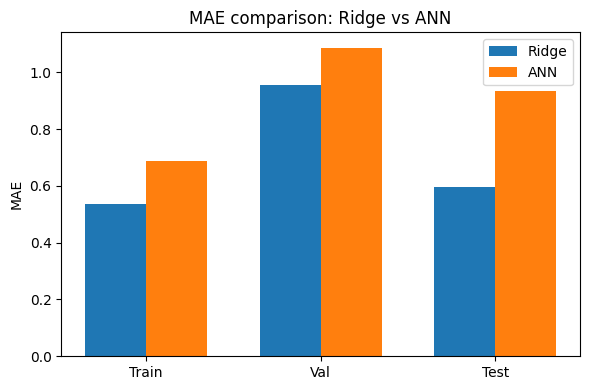

In [50]:

# Evaluation helpers

import torch, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def ann_predict(model, X_arr, batch_size=512, device="cpu"):
    model.eval()
    y_out = []
    with torch.no_grad():
        for i in range(0, len(X_arr), batch_size):
            xb = torch.tensor(X_arr[i:i+batch_size],
                              dtype=torch.float32,
                              device=device)
            y_out.append(model(xb).cpu().numpy())
    return np.vstack(y_out).squeeze()

def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    return {
        "MAE" : mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "R2"  : r2_score(y_true, y_pred)
    }

# ------------------------------------------------------------
# Compute metrics for all splits / both models
# ------------------------------------------------------------
splits = {
    "Train": (X_train, y_train),
    "Val"  : (X_val,   y_val),
    "Test" : (X_test,  y_test)
}

records = []
for split, (X_split, y_split) in splits.items():

    # Ridge
    y_ridge = best_ridge.predict(X_split)
    rec_ridge = metrics(y_split, y_ridge)
    rec_ridge.update({"Model": "Ridge", "Split": split})
    records.append(rec_ridge)

    # ANN
    y_ann = ann_predict(final_model, X_split, device="cuda" if torch.cuda.is_available() else "cpu")
    rec_ann = metrics(y_split, y_ann)
    rec_ann.update({"Model": "ANN", "Split": split})
    records.append(rec_ann)

df_metrics = pd.DataFrame(records)
print("\n=== Metric table (lower is better except R²) ===")
display(df_metrics.pivot(index="Split", columns="Model", values=["MAE","RMSE","R2"]))

# ------------------------------------------------------------
# Quick visualisation:  grouped bar‑chart for MAE
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6,4))
width = 0.35
x = np.arange(len(splits))  # Train, Val, Test

mae_ridge = df_metrics[df_metrics["Model"]=="Ridge"]["MAE"].values
mae_ann   = df_metrics[df_metrics["Model"]=="ANN"]["MAE"].values

ax.bar(x - width/2, mae_ridge, width, label="Ridge")
ax.bar(x + width/2, mae_ann,   width, label="ANN")

ax.set_xticks(x)
ax.set_xticklabels(splits.keys())
ax.set_ylabel("MAE")
ax.set_title("MAE comparison: Ridge vs ANN")
ax.legend()
plt.tight_layout()
plt.show()


# 1st round of testing

We saw the following metrics, which showed the Ridge model notably outperforming the ANN:

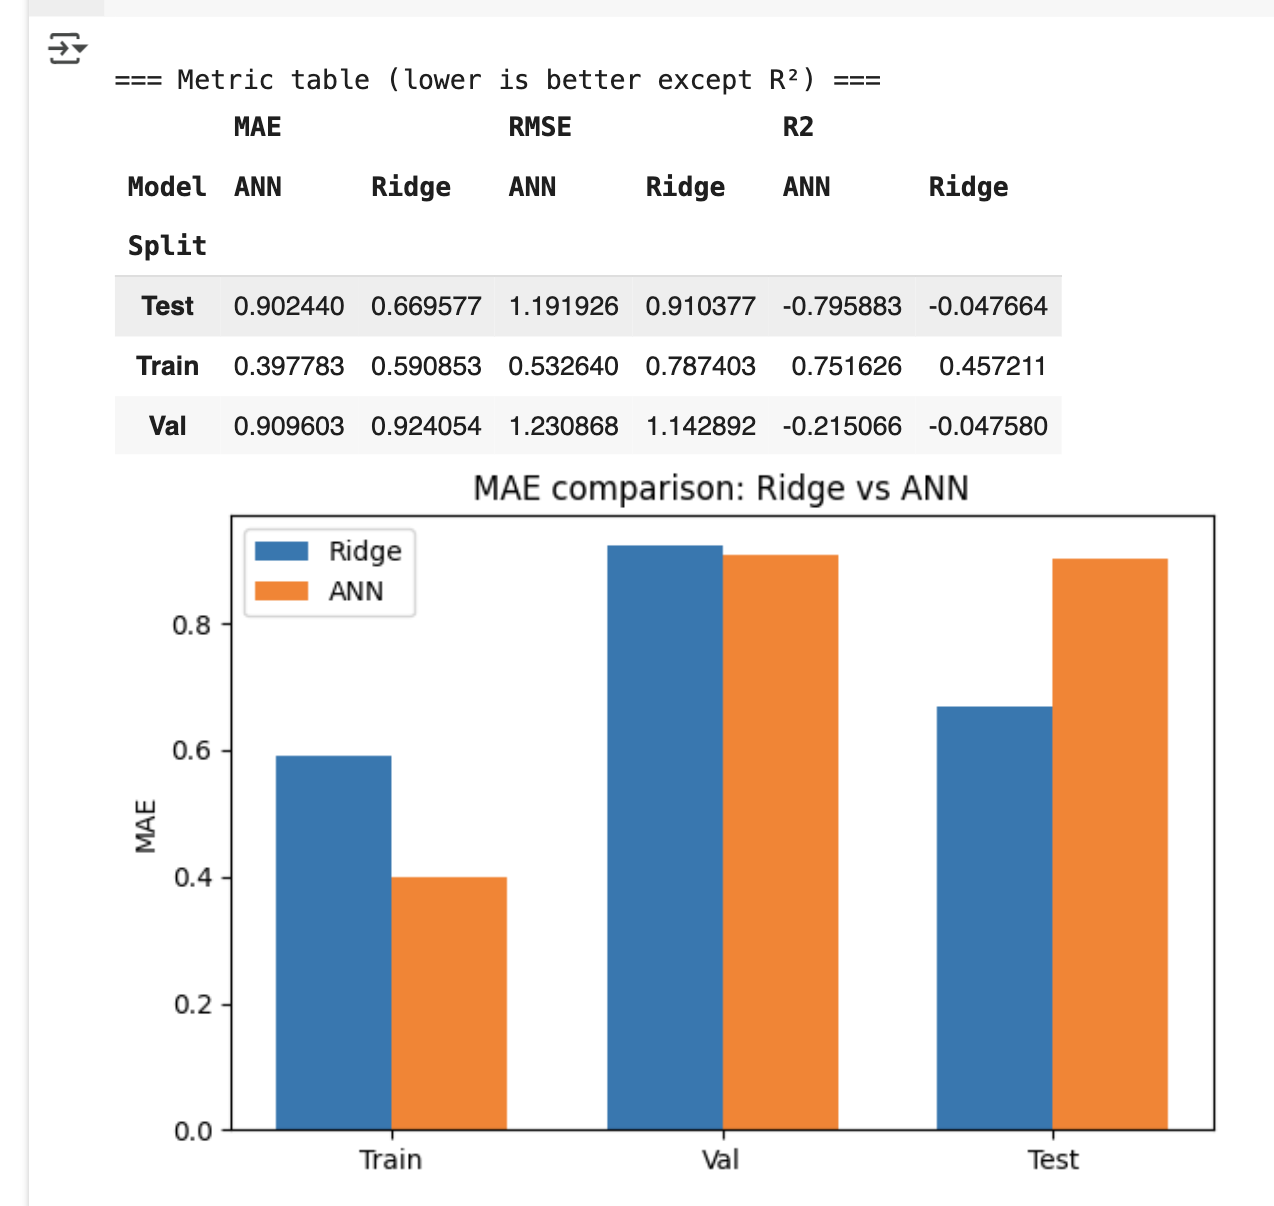

#Trying some experiments:

Changing the scale inputs and drop out (from 0.3 to 0.1) in Class PosterGenreNet(), applying Batch Normalization, " self.bn = nn.BatchNorm1d(2048 + n_genres)":

Results:

This only worsened the difference between Ridge and ANN somehow:

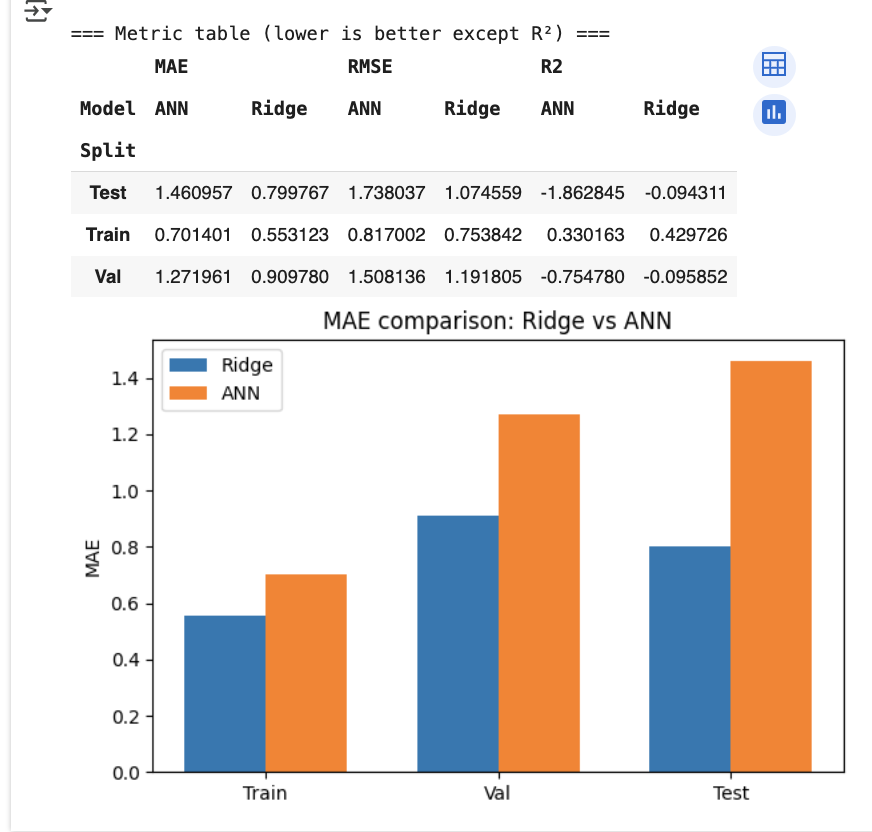



#Trying another Experiment with a wider network, longer training (highlighted in Experiment 3 code)

It helped slightly but couldn't overcome the problem:

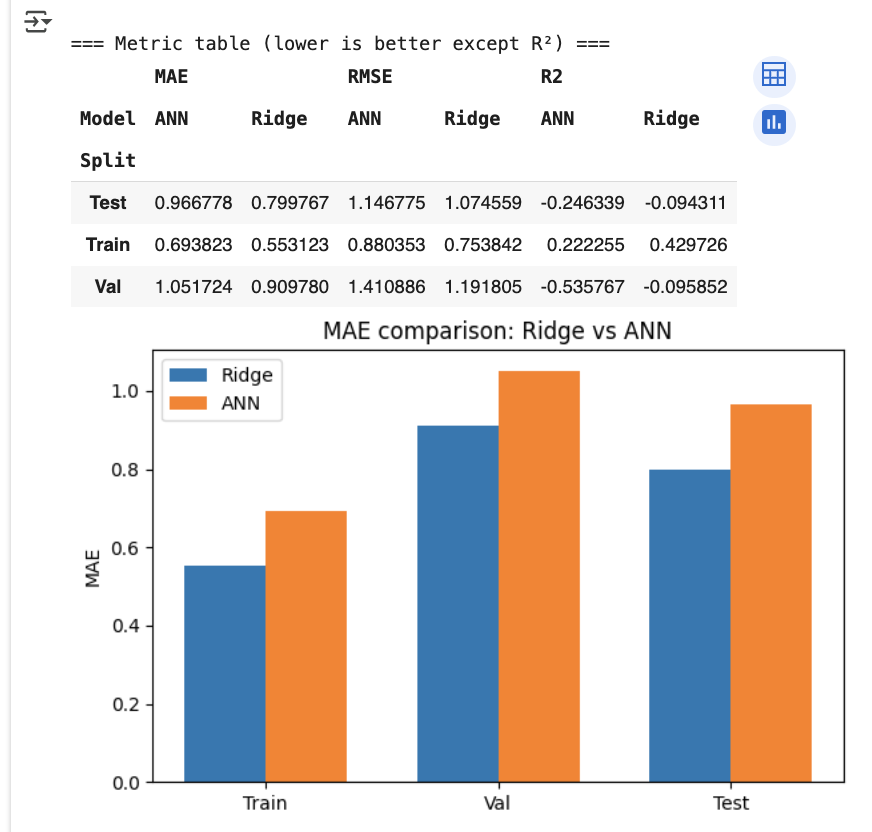


#Some Notes:

Ridge may be outperforming because the dataset is so small (<500 posters)


#Last Round of Quick Experiments (In cell above the Visualization and Evaluation Cell)

# **Getting rid of dropout entirely: **

Result: No‑dropout  Val MAE = 1.043, an improvement but not crossing the line to beat Ridge


# ** Stronger L2 **


Result: Weight‑decay  Val MAE = 1.078, not enough still

# Tuning ResNet more

Result: Fine‑tune layer3+4  Val MAE = 1.081

similiar stats

# Embedding for Genres


Genre‑proj  Val MAE = 1.354

Only worsened the problem






# Streamlit App

## Create Streamlit App

In [51]:
!pip install -q streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import time
import random

st.write("""
# 🎬 CineGauge - Movie Poster Analyzer

## 1. Upload your movie poster
""")
uploaded_file = st.file_uploader("Choose a file (jpg, jpeg, png)", type=["jpg","jpeg","png"])

st.write("""
## 2. Choose your target genre
""")
genre_selected = st.selectbox(
    "Select one genre",
    ("Drama", "Comedy", "Romance", "Science Fiction", "Adventure", "Action", "Biography", "History", "Sport", "Thriller", "Horror", "War", "Fantasy", "Crime", "Mystery", "Animation", "Musical", "Documentary", "Family", "Western", "Film-Noir"),
)

st.write("""
## 3. Predict the rating of the movie
""")
if st.button("Analyze") and uploaded_file is not None and genre_selected is not None:
    with st.spinner("Wait for it...", show_time=False):
        image_array = process_image(Image.open(uploaded_file))
        genre_array = [1 if genre == genre_selected else 0 for genre in all_genres]
        x_inputs = prepare_model_inputs(np.array([image_array]), np.array([genre_array]))
        y_predict = best_ridge.predict(x_inputs)
        st.write("Predicted IMDB Rating: " + str(round(y_predict.item(0), 2)))

Overwriting app.py


## Run Streamlit App

Install LocalTunnel to access the Streamlit App

In [53]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 1s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

Run Streamlit in the background

In [54]:
!streamlit run /content/app.py &>/content/logs.txt &

Output the localtunnel path and expose the port

In [55]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.55.200.161


In [56]:
!npx localtunnel --port 8501

⠙your url is: https://twelve-buckets-knock.loca.lt
^C
